In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# file_name = "AB_NYC_2019.csv"
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\machineWithPython\\newYorkCityAirbnb\\AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
df.shape

(48895, 16)

In [49]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [50]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [51]:
data = df.drop(['id','name','host_id','last_review'], axis = 1)

In [52]:
data.shape

(48895, 12)

In [53]:
data.isnull().sum()

host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [54]:
data[['reviews_per_month', 'host_name']] = data[['reviews_per_month', 'host_name']].replace("?", np.nan)

data['host_name'] = data['host_name'].fillna('Unknown')

data['reviews_per_month'] = data['reviews_per_month'].astype(float)
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [55]:
data.isnull().sum()

host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [56]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [57]:
data.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


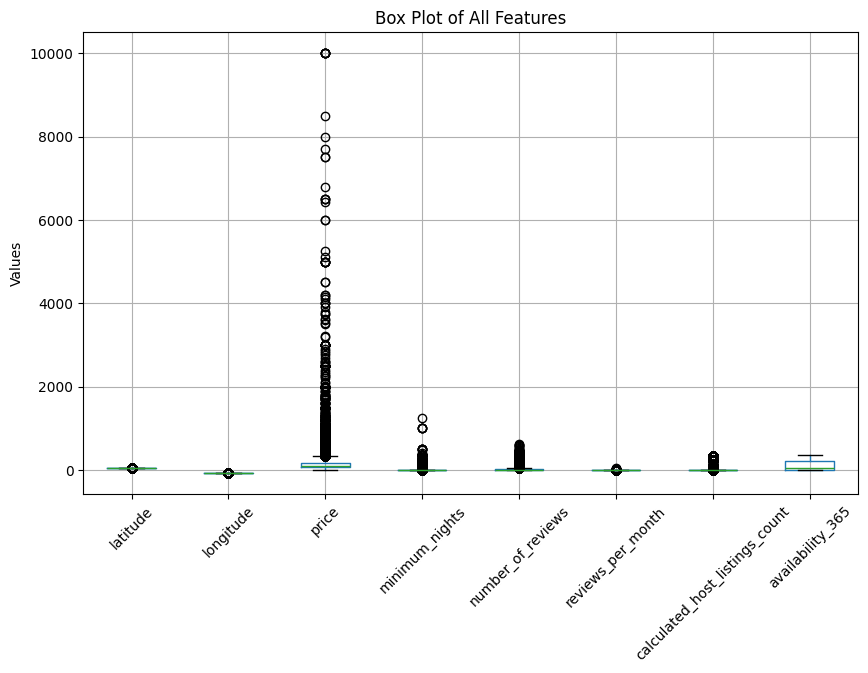

In [58]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

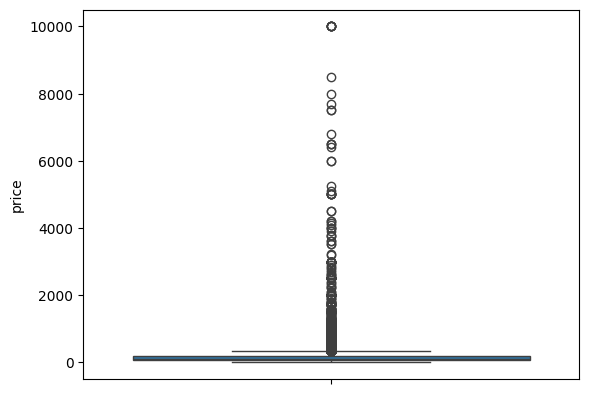

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data['price'])
plt.show()

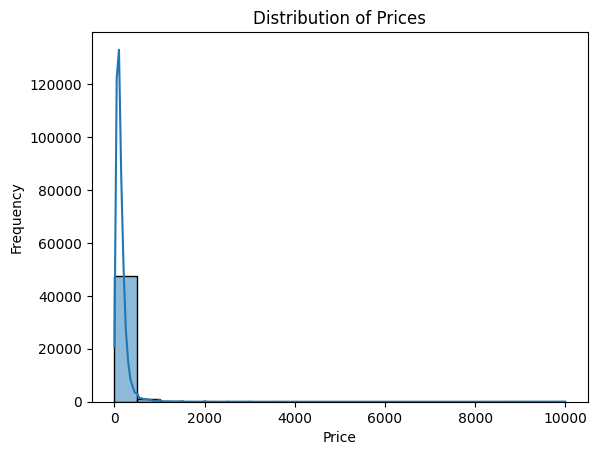

In [60]:
import seaborn as sns

sns.histplot(data=data, x='price', bins=20, kde=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [61]:
data = data[(data['price'] > 0) & (data['price'] <= 1000)]
data = data[data['minimum_nights'] <= 365]
data = data[data['availability_365'] > 0]

In [62]:
data['price_log'] = np.log1p(data['price'])  
data['minimum_nights_log'] = np.log1p(data['minimum_nights'])
data['number_of_reviews_log'] = np.log1p(data['number_of_reviews'])
data['calculated_host_listings_count_log'] = np.log1p(data['calculated_host_listings_count'])

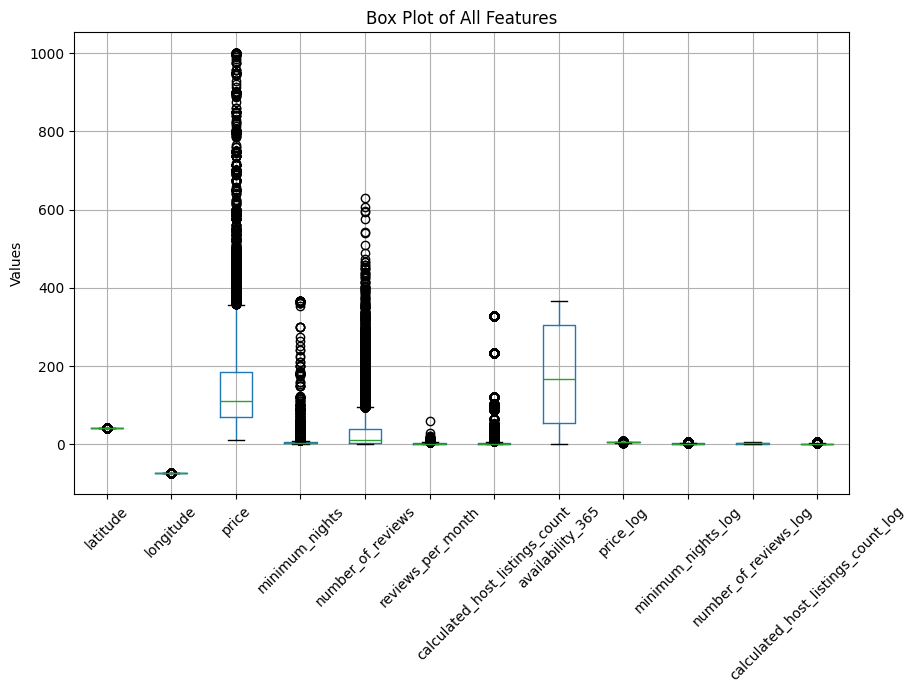

In [63]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

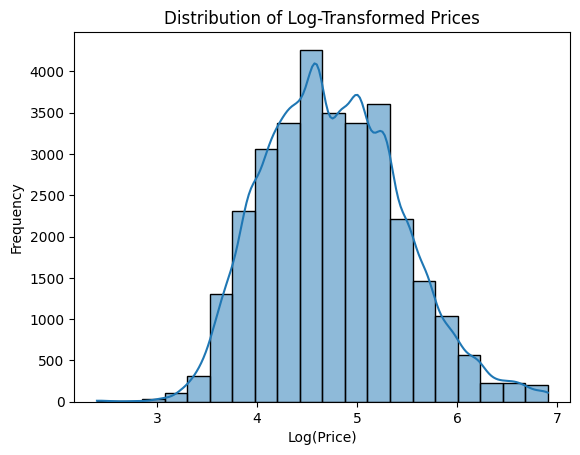

In [64]:
sns.histplot(data=data, x='price_log', bins=20, kde=True)
plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.show()

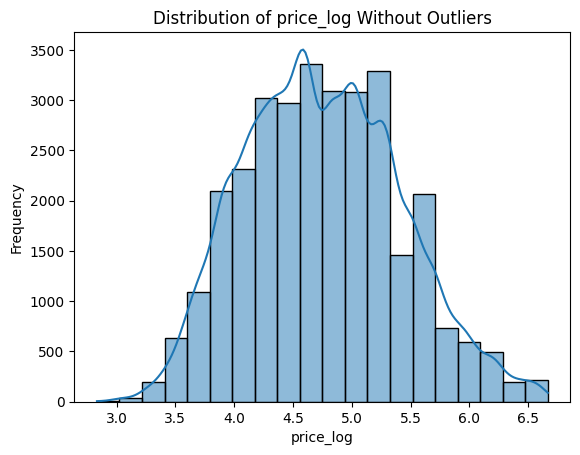

In [65]:
Q1 = data['price_log'].quantile(0.25)
Q3 = data['price_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outlier prices
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
df_cleaned = data[(data['price_log'] >= lower_bound) & (data['price_log'] <= upper_bound)]

# Visualize the cleaned data
sns.histplot(data=df_cleaned, x='price_log', bins=20, kde=True)
plt.title("Distribution of price_log Without Outliers")
plt.xlabel("price_log")
plt.ylabel("Frequency")
plt.show()

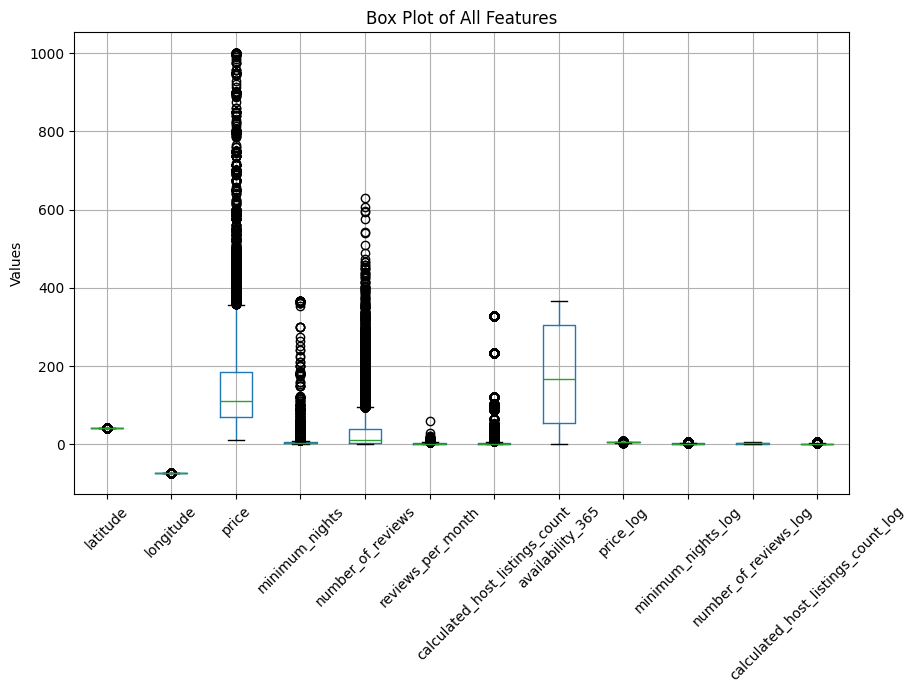

In [66]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

In [68]:
data.drop(columns=['price','minimum_nights','number_of_reviews','calculated_host_listings_count'], inplace=True)

In [69]:
data.head(20)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,availability_365,price_log,minimum_nights_log,number_of_reviews_log,calculated_host_listings_count_log
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.210000,365,5.010635,0.693147,2.302585,1.945910
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.380000,355,5.420535,0.693147,3.828641,1.098612
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,1.373221,365,5.017280,1.386294,0.000000,0.693147
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.640000,194,4.499810,0.693147,5.602119,0.693147
5,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,0.590000,129,5.303305,1.386294,4.317488,0.693147
7,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,3.470000,220,4.382027,1.098612,6.066108,0.693147
9,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1.330000,188,5.017280,0.693147,5.081404,1.609438
10,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,0.430000,6,4.912655,1.791759,3.988984,0.693147
11,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,1.500000,39,4.454347,1.098612,5.241747,0.693147
12,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,1.340000,314,4.499810,1.609438,5.123964,1.386294


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[['price_log', 'minimum_nights_log', 'reviews_per_month','availability_365','number_of_reviews_log','calculated_host_listings_count_log']] = scaler.fit_transform(
    data[['price_log', 'minimum_nights_log', 'reviews_per_month','availability_365','number_of_reviews_log','calculated_host_listings_count_log']]
)


In [71]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['host_name'] = encoder.fit_transform(data['host_name'])
data['neighbourhood_group'] = encoder.fit_transform(data['neighbourhood_group'])
data['neighbourhood'] = encoder.fit_transform(data['neighbourhood'])
data['room_type'] = encoder.fit_transform(data['room_type'])

In [72]:
data.head(20)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,reviews_per_month,availability_365,price_log,minimum_nights_log,number_of_reviews_log,calculated_host_listings_count_log
0,3603,1,107,40.64749,-73.97237,1,0.210000,365,5.010635,0.693147,2.302585,1.945910
1,3444,2,126,40.75362,-73.98377,0,0.380000,355,5.420535,0.693147,3.828641,1.098612
2,2092,2,93,40.80902,-73.94190,1,1.373221,365,5.017280,1.386294,0.000000,0.693147
3,4466,1,40,40.68514,-73.95976,0,4.640000,194,4.499810,0.693147,5.602119,0.693147
5,1374,2,136,40.74767,-73.97500,0,0.590000,129,5.303305,1.386294,4.317488,0.693147
7,6937,2,94,40.76489,-73.98493,1,3.470000,220,4.382027,1.098612,6.066108,0.693147
9,861,2,34,40.71344,-73.99037,0,1.330000,188,5.017280,0.693147,5.081404,1.609438
10,4324,2,200,40.80316,-73.96545,0,0.430000,6,4.912655,1.791759,3.988984,0.693147
11,3898,2,94,40.76076,-73.98867,1,1.500000,39,4.454347,1.098612,5.241747,0.693147
12,4272,1,180,40.66829,-73.98779,1,1.340000,314,4.499810,1.609438,5.123964,1.386294


In [73]:
x = data.iloc[:, list(range(0, 8)) + list(range(9, 12))].values
y = data.iloc[:, 8].values

# X = data.drop('price', axis=1)
# y = data['price']


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [75]:
Y_pred = regressor.predict(X_test)

In [76]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)  
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.2251613675350989
R-squared Score: 0.5193422781753105
Mean Absolute Error: 0.3559021590257057


In [77]:
Trial_Data = np.array([[4000, 2, 210, 39, -75 , 1, 4, 150, 0.6, 2.5, 1.6]])
regressor.predict(Trial_Data)[0]

np.float64(6.0784897380654)